In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
import seaborn as sns

# store the data set into the dataframe

In [23]:
df = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/00542/log2.csv')

## check the shape of dataframe

In [24]:
df.shape

(65532, 12)

## detailed information of dataframe

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65532 entries, 0 to 65531
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Source Port           65532 non-null  int64 
 1   Destination Port      65532 non-null  int64 
 2   NAT Source Port       65532 non-null  int64 
 3   NAT Destination Port  65532 non-null  int64 
 4   Action                65532 non-null  object
 5   Bytes                 65532 non-null  int64 
 6   Bytes Sent            65532 non-null  int64 
 7   Bytes Received        65532 non-null  int64 
 8   Packets               65532 non-null  int64 
 9   Elapsed Time (sec)    65532 non-null  int64 
 10  pkts_sent             65532 non-null  int64 
 11  pkts_received         65532 non-null  int64 
dtypes: int64(11), object(1)
memory usage: 6.0+ MB


## display data columns

In [26]:
df.columns

Index(['Source Port', 'Destination Port', 'NAT Source Port',
       'NAT Destination Port', 'Action', 'Bytes', 'Bytes Sent',
       'Bytes Received', 'Packets', 'Elapsed Time (sec)', 'pkts_sent',
       'pkts_received'],
      dtype='object')

## data description

In [27]:
df.describe()

,Source Port,Destination Port,NAT Source Port,NAT Destination Port,Bytes,Bytes Sent,Bytes Received,Packets,Elapsed Time (sec),pkts_sent,pkts_received
count,65532.000000,65532.000000,65532.000000,65532.000000,6.553200e+04,6.553200e+04,6.553200e+04,6.553200e+04,65532.000000,65532.000000,65532.000000
mean,49391.969343,10577.385812,19282.972761,2671.049930,9.712395e+04,2.238580e+04,7.473815e+04,1.028660e+02,65.833577,41.399530,61.466505
std,15255.712537,18466.027039,21970.689669,9739.162278,5.618439e+06,3.828139e+06,2.463208e+06,5.133002e+03,302.461762,3218.871288,2223.332271
min,0.000000,0.000000,0.000000,0.000000,6.000000e+01,6.000000e+01,0.000000e+00,1.000000e+00,0.000000,1.000000,0.000000
25%,49183.000000,80.000000,0.000000,0.000000,6.600000e+01,6.600000e+01,0.000000e+00,1.000000e+00,0.000000,1.000000,0.000000
50%,53776.500000,445.000000,8820.500000,53.000000,1.680000e+02,9.000000e+01,7.900000e+01,2.000000e+00,15.000000,1.000000,1.000000
75%,58638.000000,15000.000000,38366.250000,443.000000,7.522500e+02,2.100000e+02,4.490000e+02,6.000000e+00,30.000000,3.000000,2.000000
max,65534.000000,65535.000000,65535.000000,65535.000000,1.269359e+09,9.484772e+08,3.208818e+08,1.036116e+06,10824.000000,747520.000000,327208.000000


# Data cleaning

In [28]:
df.head(10)

,Source Port,Destination Port,NAT Source Port,NAT Destination Port,Action,Bytes,Bytes Sent,Bytes Received,Packets,Elapsed Time (sec),pkts_sent,pkts_received
0,57222,53,54587,53,allow,177,94,83,2,30,1,1
1,56258,3389,56258,3389,allow,4768,1600,3168,19,17,10,9
2,6881,50321,43265,50321,allow,238,118,120,2,1199,1,1
3,50553,3389,50553,3389,allow,3327,1438,1889,15,17,8,7
4,50002,443,45848,443,allow,25358,6778,18580,31,16,13,18
5,51465,443,39975,443,allow,3961,1595,2366,21,16,12,9
6,60513,47094,45469,47094,allow,320,140,180,6,7,3,3
7,50049,443,21285,443,allow,7912,3269,4643,23,96,12,11
8,52244,58774,2211,58774,allow,70,70,0,1,5,1,0
9,50627,443,16215,443,allow,8256,1674,6582,31,75,15,16


In [29]:
y = df['Action'].values
y = y.reshape(-1,1)
x_data = df.drop(['Action'],axis = 1)
print(x_data)

       Source Port  Destination Port  NAT Source Port  NAT Destination Port  \
0            57222                53            54587                    53   
1            56258              3389            56258                  3389   
2             6881             50321            43265                 50321   
3            50553              3389            50553                  3389   
4            50002               443            45848                   443   
...            ...               ...              ...                   ...   
65527        63691                80            13237                    80   
65528        50964                80            13485                    80   
65529        54871               445                0                     0   
65530        54870               445                0                     0   
65531        54867               445                0                     0   

         Bytes  Bytes Sent  Bytes Received  Packets

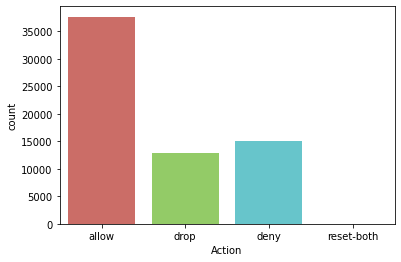

In [30]:
sns.countplot(x='Action',data=df,palette='hls')
plt.show()

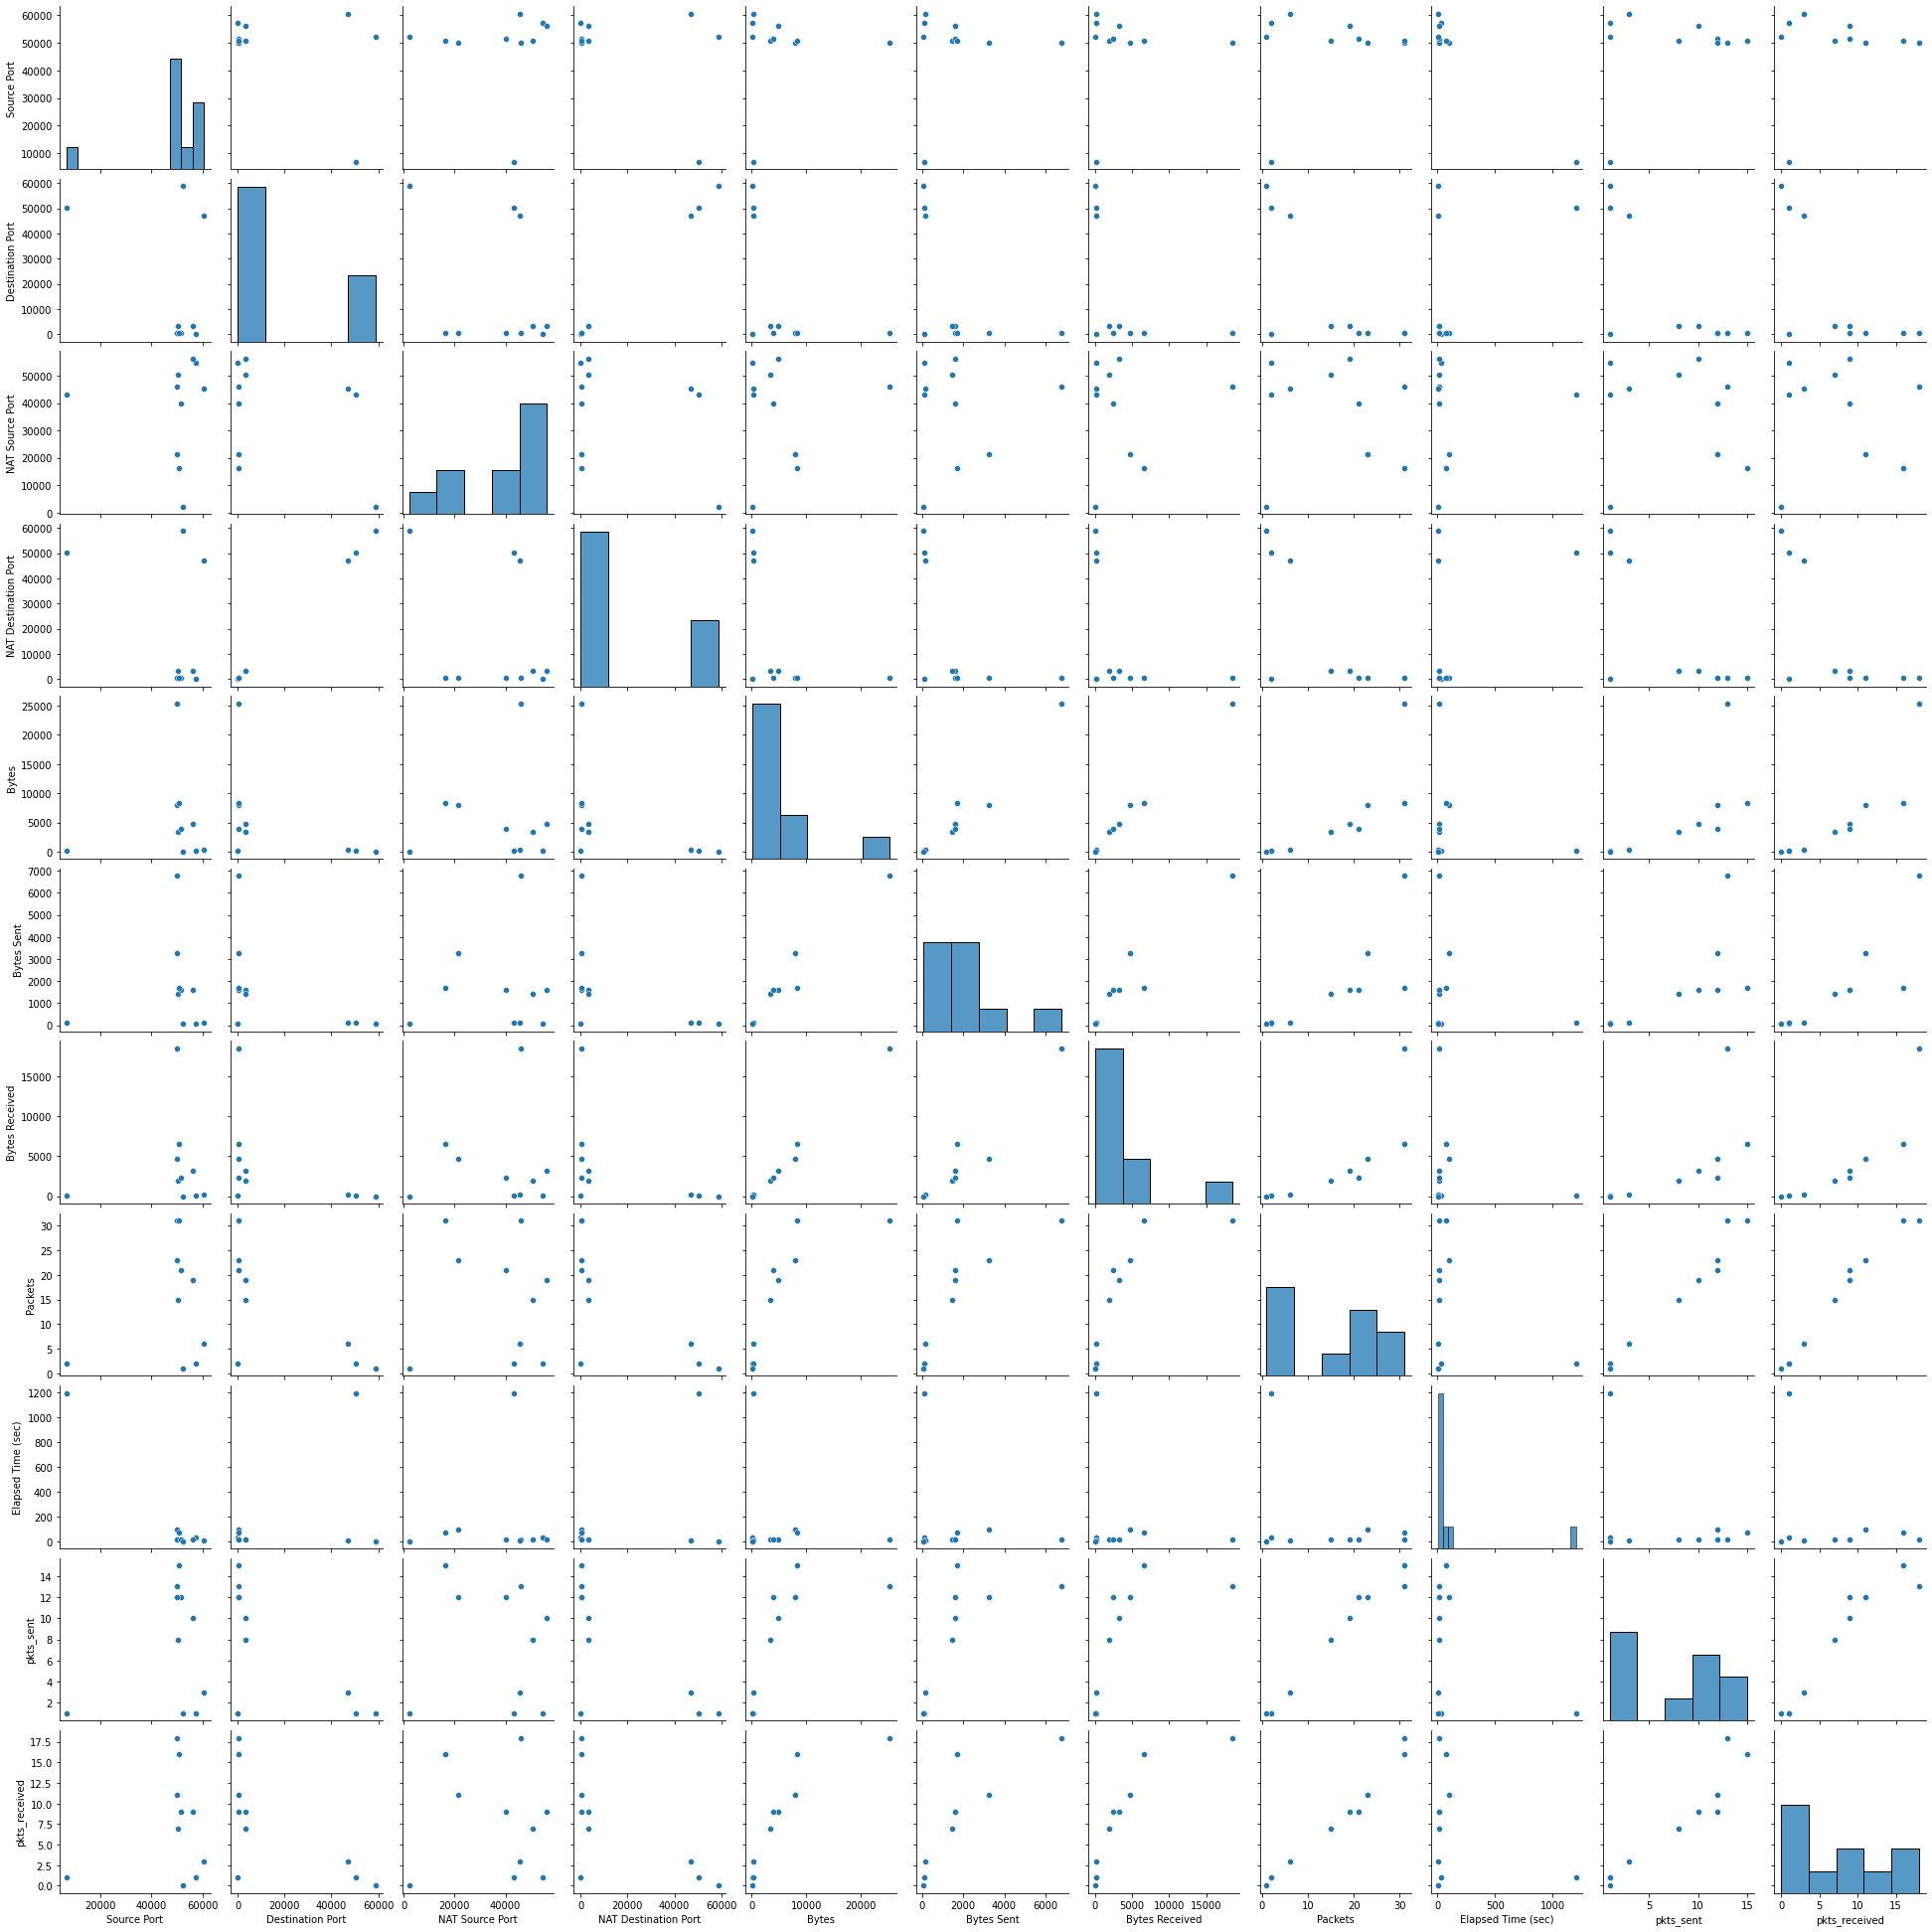

In [31]:
sns.pairplot(df.head(10))
plt.show()

## Display the Null values percentage against every columns (compare to the total number of records)

In [32]:
null_values = df.isnull().sum() * 100 / len(df)
null_values_df = pd.DataFrame({'column_name': df.columns,'percent_missing': null_values})
null_values_df

,column_name,percent_missing
Source Port,Source Port,0.0
Destination Port,Destination Port,0.0
NAT Source Port,NAT Source Port,0.0
NAT Destination Port,NAT Destination Port,0.0
Action,Action,0.0
Bytes,Bytes,0.0
Bytes Sent,Bytes Sent,0.0
Bytes Received,Bytes Received,0.0
Packets,Packets,0.0
Elapsed Time (sec),Elapsed Time (sec),0.0


## Check if there's duplicate data exists or not

In [33]:
df.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
65527    False
65528    False
65529    False
65530    False
65531     True
Length: 65532, dtype: bool

## Drop duplicates

In [34]:
df.drop_duplicates(subset=None, keep='first', inplace=False, ignore_index=False)

,Source Port,Destination Port,NAT Source Port,NAT Destination Port,Action,Bytes,Bytes Sent,Bytes Received,Packets,Elapsed Time (sec),pkts_sent,pkts_received
0,57222,53,54587,53,allow,177,94,83,2,30,1,1
1,56258,3389,56258,3389,allow,4768,1600,3168,19,17,10,9
2,6881,50321,43265,50321,allow,238,118,120,2,1199,1,1
3,50553,3389,50553,3389,allow,3327,1438,1889,15,17,8,7
4,50002,443,45848,443,allow,25358,6778,18580,31,16,13,18
...,...,...,...,...,...,...,...,...,...,...,...,...
65526,51710,43069,65147,43069,allow,70,70,0,2,8,2,0
65527,63691,80,13237,80,allow,314,192,122,6,15,4,2
65528,50964,80,13485,80,allow,4680740,67312,4613428,4675,77,985,3690
65529,54871,445,0,0,drop,70,70,0,1,0,1,0


## At this stage data is cleaned and ready for further process

In [35]:
df = df.drop_duplicates(subset=None, keep='first', inplace=False, ignore_index=False)

In [36]:
df

,Source Port,Destination Port,NAT Source Port,NAT Destination Port,Action,Bytes,Bytes Sent,Bytes Received,Packets,Elapsed Time (sec),pkts_sent,pkts_received
0,57222,53,54587,53,allow,177,94,83,2,30,1,1
1,56258,3389,56258,3389,allow,4768,1600,3168,19,17,10,9
2,6881,50321,43265,50321,allow,238,118,120,2,1199,1,1
3,50553,3389,50553,3389,allow,3327,1438,1889,15,17,8,7
4,50002,443,45848,443,allow,25358,6778,18580,31,16,13,18
...,...,...,...,...,...,...,...,...,...,...,...,...
65526,51710,43069,65147,43069,allow,70,70,0,2,8,2,0
65527,63691,80,13237,80,allow,314,192,122,6,15,4,2
65528,50964,80,13485,80,allow,4680740,67312,4613428,4675,77,985,3690
65529,54871,445,0,0,drop,70,70,0,1,0,1,0


In [37]:
x = (x_data - np.min(x_data)) / (np.max(x_data) / np.min(x_data)).values
x.head()

,Source Port,Destination Port,NAT Source Port,NAT Destination Port,Bytes,Bytes Sent,Bytes Received,Packets,Elapsed Time (sec),pkts_sent,pkts_received
0,0.0,0.0,0.0,0.0,0.000006,0.000002,0.0,9.651429e-07,0.0,0.000000,0.0
1,0.0,0.0,0.0,0.0,0.000223,0.000097,0.0,1.737257e-05,0.0,0.000012,0.0
2,0.0,0.0,0.0,0.0,0.000008,0.000004,0.0,9.651429e-07,0.0,0.000000,0.0
3,0.0,0.0,0.0,0.0,0.000154,0.000087,0.0,1.351200e-05,0.0,0.000009,0.0
4,0.0,0.0,0.0,0.0,0.001196,0.000425,0.0,2.895429e-05,0.0,0.000016,0.0


## Split data into train and test

In [38]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3,random_state= 300)
print("x_train",x_train.shape)
print("x_test",x_test.shape)
print("y_train",y_train.shape)
print("y_test",y_test.shape)

x_train (45872, 11)
x_test (19660, 11)
y_train (45872, 1)
y_test (19660, 1)


              precision    recall  f1-score   support

       allow       0.99      0.96      0.98     11381
        deny       0.75      0.98      0.85      4456
        drop       0.88      0.67      0.76      3808
  reset-both       0.83      0.33      0.48        15

    accuracy                           0.91     19660
   macro avg       0.87      0.74      0.77     19660
weighted avg       0.92      0.91      0.91     19660

accuracy:0.9074


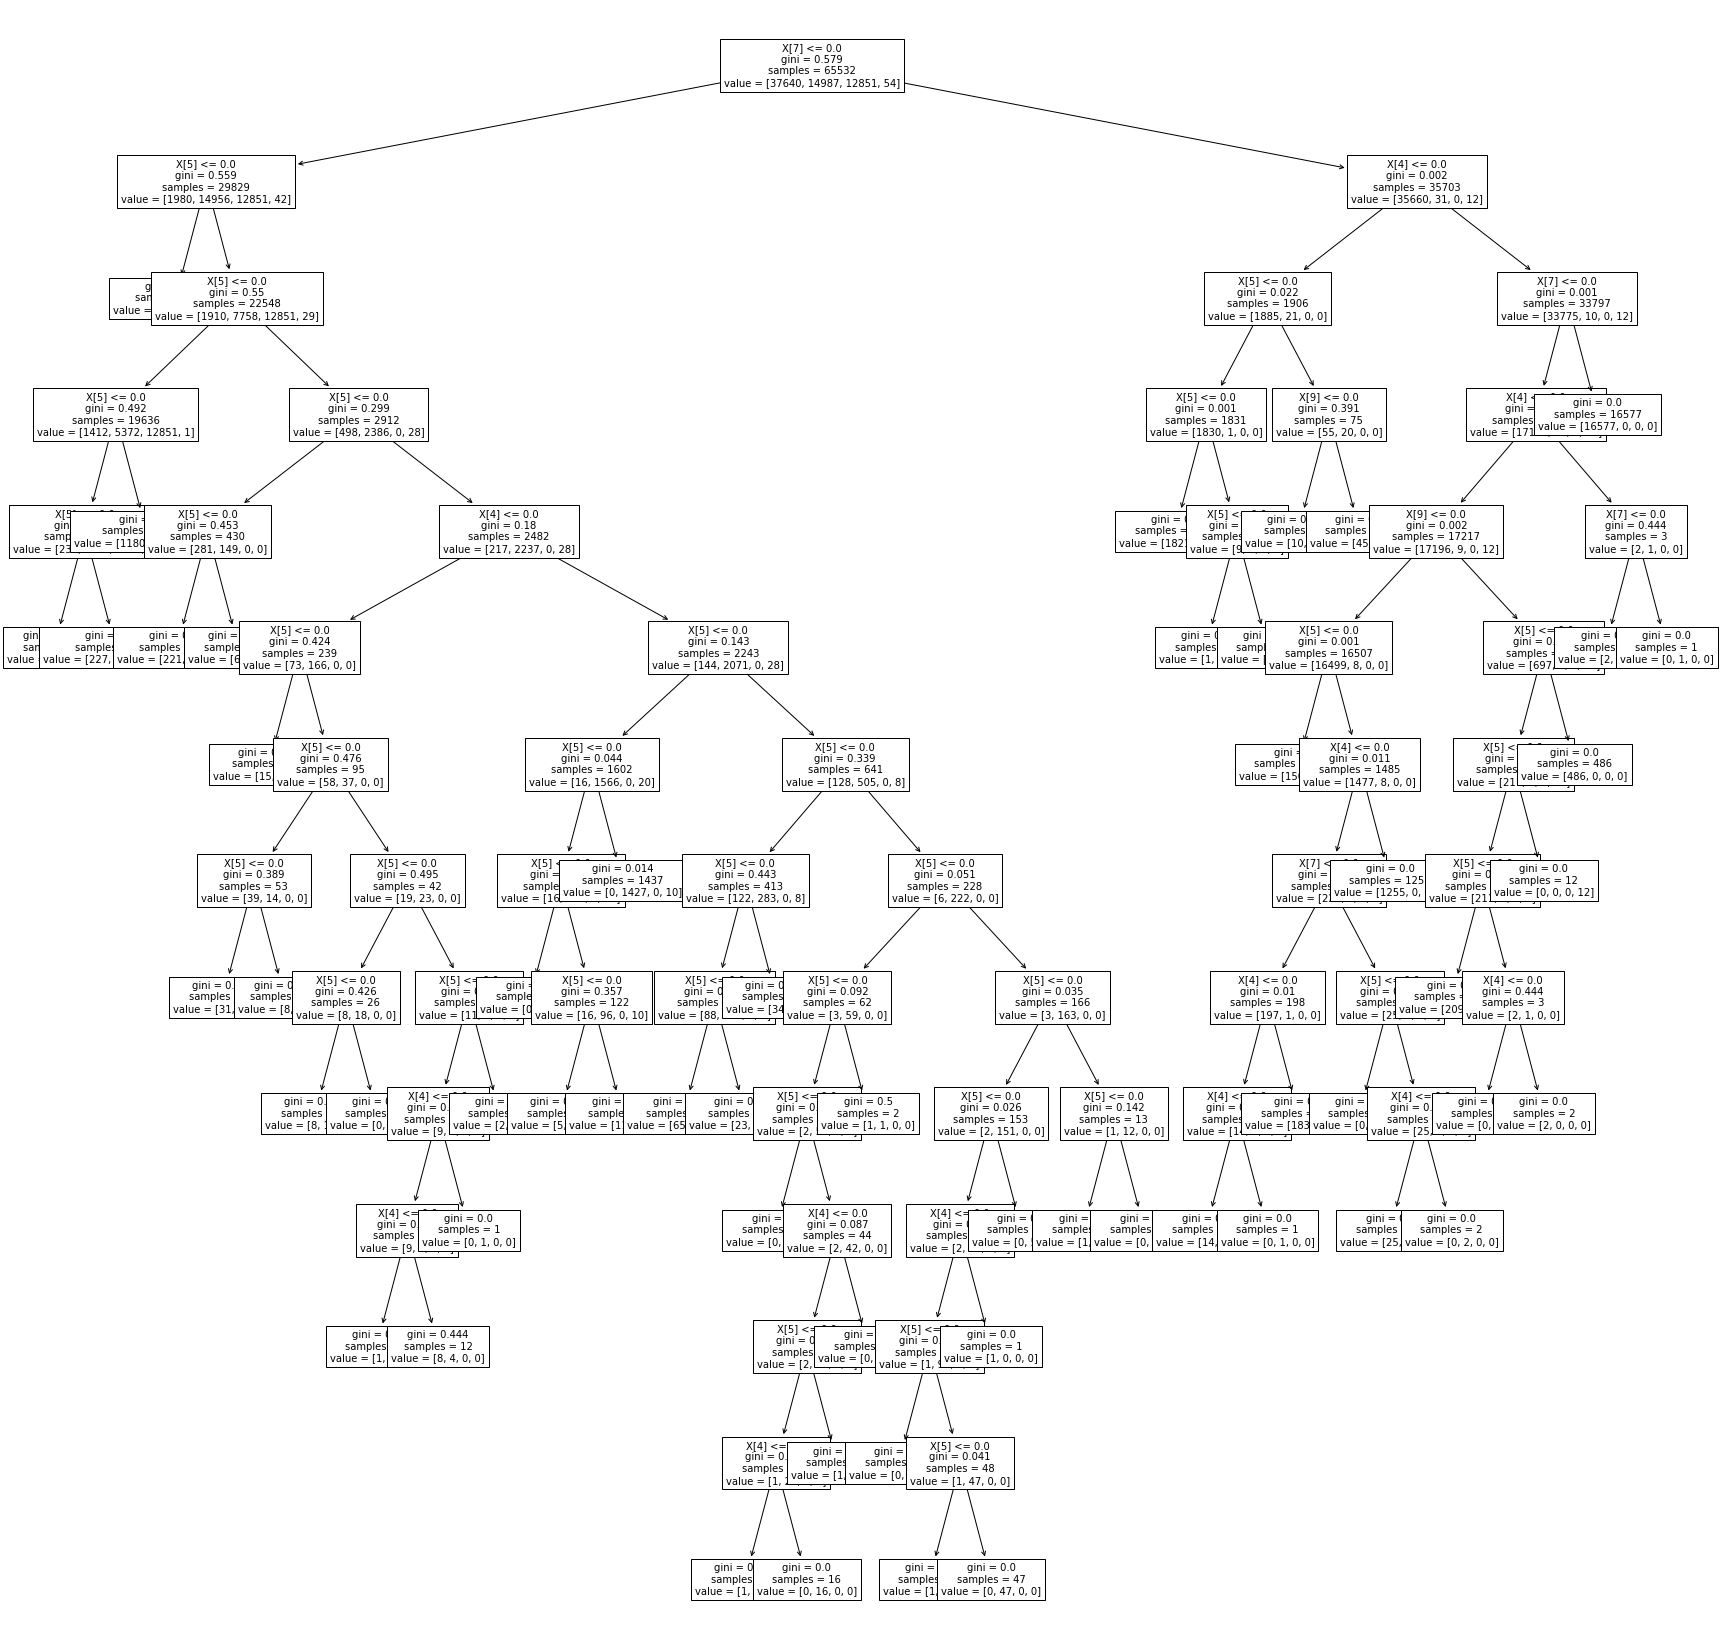

In [39]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn import preprocessing
from sklearn.metrics import accuracy_score

dt = DecisionTreeClassifier()
dt = dt.fit(x_train,y_train)
y_forecast=dt.predict(x_test)

from sklearn.metrics import classification_report
print(classification_report(y_test, dt.predict(x_test)))
print('accuracy:{:.4f}'.format(dt.score(x_test, y_test)))

from sklearn import tree
plt.figure(figsize=(30,30))
temp = tree.plot_tree(dt.fit(x,y), fontsize=10)
plt.show()

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

### Accuracy = 90%

In [40]:
#Nave Bayes Classifier

from sklearn.naive_bayes import GaussianNB

nb = GaussianNB()
nb = nb.fit(x_train, y_train.ravel())
y_forecast=nb.predict(x_test)

from sklearn.metrics import classification_report
print(classification_report(y_test, nb.predict(x_test)))
print('Nave Bayes Classifier{:.4f}'.format(nb.score(x_test, y_test)))

/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

       allow       1.00      0.36      0.53     11381
        deny       0.11      0.14      0.12      4456
        drop       0.37      1.00      0.54      3808
  reset-both       0.00      0.00      0.00        15

    accuracy                           0.43     19660
   macro avg       0.37      0.37      0.30     19660
weighted avg       0.68      0.43      0.44     19660

Nave Bayes Classifier0.4311


/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [41]:
#Logistic Regreession Classifier

from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(solver='lbfgs')
lr = lr.fit(x_train, y_train.ravel())
y_forecast=lr.predict(x_test)


from sklearn.metrics import classification_report
print(classification_report(y_test, lr.predict(x_test)))
print('accuracy:{:.4f}'.format(lr.score(x_test, y_test)))




/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

       allow       0.58      1.00      0.73     11381
        deny       0.00      0.00      0.00      4456
        drop       0.00      0.00      0.00      3808
  reset-both       0.00      0.00      0.00        15

    accuracy                           0.58     19660
   macro avg       0.14      0.25      0.18     19660
weighted avg       0.34      0.58      0.42     19660

accuracy:0.5789


/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### Accuracy = 57.89%